<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/Hazi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aktivációs függvények

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import numpy as np

### Sigmoid

In [30]:
# 1/1+e^-z

x = [z * 0.01 for z in range(-1000, 1001)]
x = np.asarray(x)
y= []

for i in x:
  y.append(1 / (1 + math.exp(-i)))

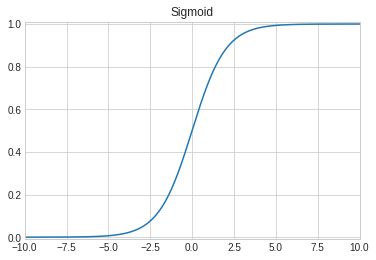

In [40]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-0.01, 1.01)
plt.plot(x, y, label = 'nem működik')
plt.title('Sigmoid')
plt.show()

### LeakyReLu

In [51]:
a = 0.1
x = np.linspace(-30, 30, 600)
y = [i if i>0 else a * i for i in x]

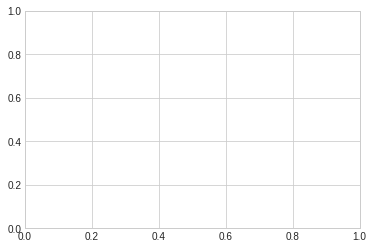

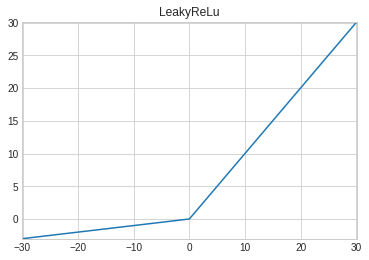

In [52]:
plt.cla()
fig, ax = plt.subplots()
plt.xlim(-30.1, 30.1)
plt.ylim(min(y)-0.1, 30.1)
plt.plot(x, y, label = 'nem működik')
plt.title('LeakyReLu')
plt.show()

## Adatbeolvasás

In [59]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT (1).csv


In [98]:
import io
borok = pd.read_csv(io.BytesIO(uploaded['WineQT.csv']))

In [99]:
borok.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [100]:
borok = borok.drop('Id', axis = 1)

In [101]:
borok.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
borok.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [103]:
y = borok.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [104]:
x = borok.drop('quality', axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)

In [106]:
x_test.shape

(115, 11)

## Adatnormalizálás

In [78]:
normal = StandardScaler()

In [107]:
x_train = normal.fit_transform(x_train)
x_test = normal.transform(x_test)

## Architektúra

In [88]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.metrics import MeanSquaredError

In [108]:
input = Input(shape = (x_train.shape[1]))
x = Dense(64, activation = 'relu')(input)
x = Dense(64, activation = 'relu')(x)
output = Dense(1)(x)

In [109]:
model = keras.Model(input, output)

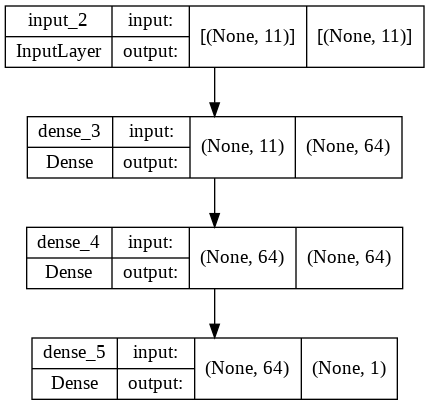

In [110]:
plot_model(model, show_shapes = True)

In [111]:
model.compile(loss = 'MSE', metrics = [MeanSquaredError()])

In [112]:
model.fit(x = x_train, y = y_train, epochs = 20)

Epoch 1/20
33/33 [==============================] - 1s 2ms/step - loss: 14.6224 - mean_squared_error: 14.6224
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 3.7523 - mean_squared_error: 3.7523
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 2.3687 - mean_squared_error: 2.3687
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 1.7817 - mean_squared_error: 1.7817
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 1.4516 - mean_squared_error: 1.4516
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 1.1945 - mean_squared_error: 1.1945
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 1.0101 - mean_squared_error: 1.0101
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.8544 - mean_squared_error: 0.8544
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.7390 - mean_squared_error: 0.7390
Epoch 10/20
33/33 [=======

In [113]:
model.predict(x_test)

array([[5.0500474],
       [7.4337544],
       [5.600708 ],
       [7.269862 ],
       [7.290012 ],
       [6.1958804],
       [5.9296985],
       [4.7010317],
       [6.7155385],
       [5.5406737],
       [4.7437353],
       [5.5159683],
       [6.18912  ],
       [5.454056 ],
       [5.6318827],
       [5.2394233],
       [5.445081 ],
       [7.2670894],
       [5.488129 ],
       [6.949134 ],
       [5.781892 ],
       [6.7341757],
       [5.3181467],
       [5.4203978],
       [5.5887885],
       [6.0393333],
       [5.1660395],
       [5.7394695],
       [5.7596455],
       [6.378578 ],
       [4.9895334],
       [5.814008 ],
       [5.604645 ],
       [5.3750734],
       [6.8083663],
       [6.9698057],
       [5.966697 ],
       [5.269916 ],
       [7.149874 ],
       [5.8285418],
       [4.861552 ],
       [5.078356 ],
       [5.8285418],
       [4.284724 ],
       [5.081093 ],
       [7.0389886],
       [5.5642753],
       [6.926609 ],
       [6.086382 ],
       [5.8630447],


In [114]:
model.evaluate(x = x_test, y = y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6432 - mean_squared_error: 0.6432


[0.6432254910469055, 0.6432255506515503]